In [1]:
using Falcons
using Condor
using Healpix
using Plots

┌ Info: Precompiling Condor [ce3e846d-a250-429b-81e6-e6cf6b410658]
└ @ Base loading.jl:1423
┌ Warning: Package Condor does not have NPZ in its dependencies:
│ - If you have Condor checked out for development and have
│   added NPZ as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Condor
└ Loading NPZ into Condor from project dependency, future warnings for Condor are suppressed.


In [2]:
# sccaning strategy
ss = gen_ScanningStrategy()
ss.nside = 128
ss.sampling_rate = 1 #[Hz]
ss.alpha = 45 #[degree]
ss.beta = 50 #[degree]
ss.prec_rpm = period2rpm(192.348)
ss.spin_rpm = 0.05 #[rpm]
ss.hwp_rpm = 46.0 #[rpm]
ss.start_point = "pole" #You can choose "pole" or "equator"
ss.coord="G"  # You can choose "G" or "E"
ss.FP_theta = [0] #[target_det.theta[1]]
ss.FP_phi = [0] #[target_det.phi[1]] .+ 30
;

In [3]:
theta_tod, phi_tod, psi_tod, alpha_tod, pix_tod = get_pointings_theta_phi_psi_alpha_pix_tod(ss, 0, 100);

In [4]:
# Convolution Parameters
cp = gen_ConvolutionParams()
cp.npix = nside2npix(ss.nside) # Int npix
cp.lmax = 3*ss.nside-1 # Int lmax
cp.alm = rand(ComplexF64, 3, numberOfAlms(cp.lmax,cp.lmax)) # Random alm
cp.blm = rand(ComplexF64, 3, numberOfAlms(cp.lmax,cp.lmax)) # Random blm
cp.l_range = [0,100] # Int ell's calculate range
;

In [5]:
Mueller = [1 0 0
           0 1 0
           0 0 -1];

In [6]:
tod = @time tod_convolution_like_mc(cp, theta_tod[:,1], phi_tod[:,1], psi_tod[:,1],alpha_tod[:,1], Mueller);

  3.584096 seconds (6.88 M allocations: 1.099 GiB, 8.99% gc time, 32.45% compilation time)


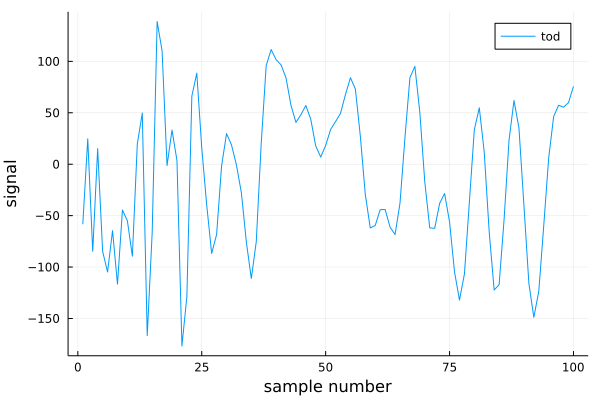

In [7]:
plot(tod[:], label = "tod", xlabel="sample number", ylabel="signal")